In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df,city_data_df,how='left', on=['city'])

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

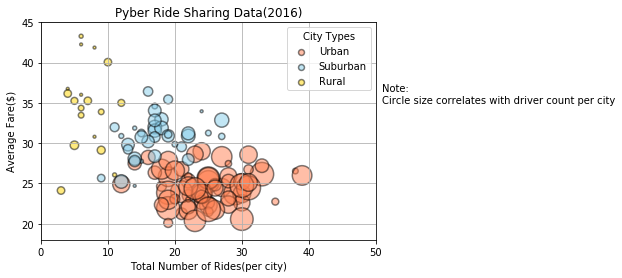

In [23]:
# Obtain the x and y coordinates for each of the three city types
group_by_city = combined_df.groupby('city')
rides_percity = group_by_city['city'].count()
fare_percity = round(group_by_city['fare'].mean(),2)
driver_count = city_data_df.set_index('city')['driver_count']
city_type = city_data_df.set_index('city')['type']

# Build the scatter plots for each city types
scatterdata_df = pd.DataFrame({'Rides':rides_percity,'Fares':fare_percity,'Driver Count':driver_count,'City Type':city_type})

#Urban
urban = scatterdata_df.loc[scatterdata_df["City Type"]== "Urban"]
plt.scatter(urban["Rides"], urban["Fares"], color = "Coral", edgecolors="black", s = urban["Driver Count"]*8, label = "Urban", alpha = 0.5, linewidth = 1.5)
#suburban
suburban = scatterdata_df.loc[scatterdata_df["City Type"]== "Suburban"]
plt.scatter(suburban["Rides"], suburban["Fares"], color = "Skyblue", edgecolors ="black", s = suburban["Driver Count"]*8, label = "Suburban", alpha = 0.5, linewidth = 1.5)
#rural
rural = scatterdata_df.loc[scatterdata_df["City Type"]== "Rural"]
plt.scatter(rural["Rides"], rural["Fares"], color = "Gold", edgecolors = "black", s = rural["Driver Count"]*8, label = "Rural", alpha = 0.5, linewidth = 1.5)
# Incorporate the other graph properties
plt.xlim(0,50)
plt.ylim(18,45)
# Create a legend
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(per city)")
plt.ylabel("Average Fare($)")
plt.grid(True)
legend = plt.legend(loc='upper right', fancybox=True, title="City Types", scatterpoints=1)
# #change the marker size manually for all three plots or city types
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]
legend.legendHandles[2]._sizes = [35]
# Incorporate a text label regarding circle size
plt.text(51, 35, 'Note:\nCircle size correlates with driver count per city')
# Save Figure
plt.savefig("bubble.png", bbox_inches = 'tight')
#plt.savefig('bubble.png', dpi=1000)

In [90]:
# Show plot
plt.show()


## Total Fares by City Type

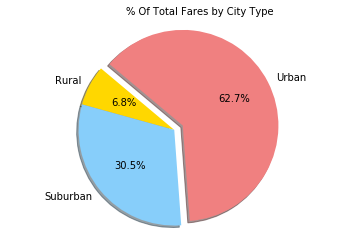

In [142]:
# Calculate Type Percents
group_by_type = combined_df.groupby('type')
fare_sum = group_by_type['fare'].sum()
# Build Pie Chart
colors = ["Gold", "LightSkyblue", "LightCoral"]
explode = (0,0, 0.1)
plt.pie(fare_sum, explode=explode, labels=fare_sum.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.text(-0.5,1.2,'% Of Total Fares by City Type')
# Save Figure
plt.savefig("farepie.png")

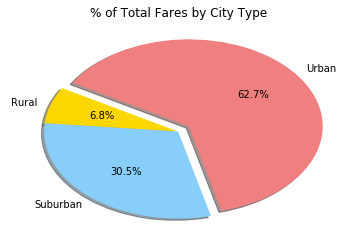

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

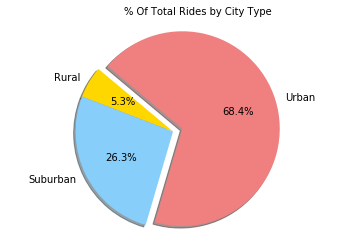

In [143]:
# Calculate Ride Percents
ride_count = group_by_type['type'].count()
ride_count
# Build Pie Chart
colors = ["Gold", "LightSkyblue", "LightCoral"]
explode = (0,0, 0.1)
plt.pie(ride_count, explode=explode, labels=ride_count.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.text(-0.5,1.2,'% Of Total Rides by City Type')
# Save Figure
plt.savefig("ridepie.png")

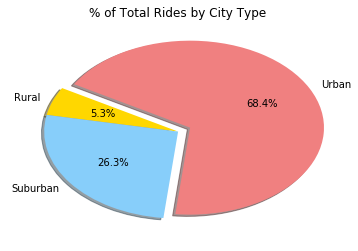

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

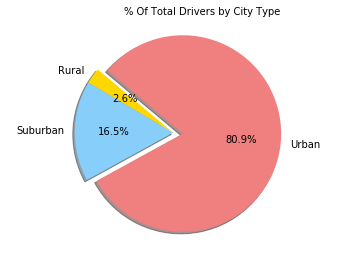

In [144]:
# Calculate Driver Percents
group_by_city_type = city_data_df.groupby('type')
driver_count = group_by_city_type['driver_count'].sum()
# Build Pie Charts
colors = ["Gold", "LightSkyblue", "LightCoral"]
explode = (0,0, 0.1)
plt.pie(driver_count, explode=explode, labels=driver_count.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.text(-0.5,1.2,'% Of Total Drivers by City Type')
# Save Figure
plt.savefig("driverpie.png")


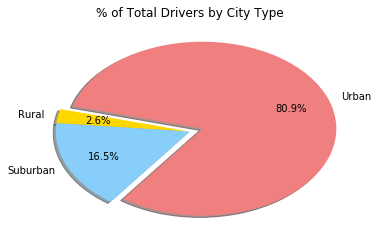

In [6]:
# Show Figure
plt.show()